<a href="https://colab.research.google.com/github/JoshuaClugston/JoshuaClugston/blob/main/model_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
 
%matplotlib inline

\begin{equation}
\begin{alignedat}{4}
\frac{dN}{dt} &= \beta_{1}N(1-N)-r_{1}\frac{N}{h+N}E -\alpha_{1}\frac{N}{h+N}A-\alpha_{2}\frac{N}{h+N}R, \\
\frac{dE}{dt} &= r_{1}\frac{N}{h+N}E - r_{2}\frac{E}{h+E}R-\beta_{2}E -\gamma_{1}\frac{E}{h+E}A, \\
\frac{dR}{dt} &= r_{2}\frac{E}{h+E}R -\beta_{3}R-r_{3}\frac{R}{h+R}A + \alpha_{2}\frac{N}{h+N}R, \\
\frac{dA}{dt} &= r_{3}\frac{R}{h+R} - \beta_{4}A + \alpha_{1}\frac{N}{h+N}A + \gamma_{1}\frac{E}{h+E}A,
\end{alignedat}
\end{equation}

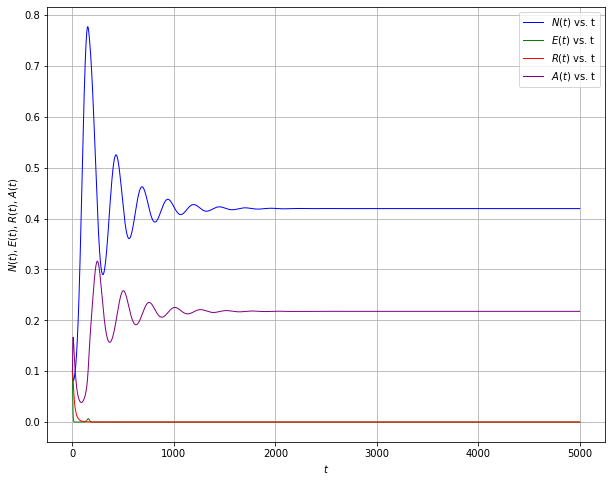

In [53]:
def model(z, t, alpha1, alpha2, alpha3, beta1, beta2, beta3, beta4, r1, r2, r3, gamma1, h):
  N, E, R, A = z
  dN = beta1*N*(1-N)-r1*N*E/(h+N) - alpha1*N*A/(h+N) - alpha2*N*R/(h+N)
  dE = r1*N*E/(h+N) - r2*E*R/(h+E) - beta2*E - gamma1*E*A/(h+E)
  dR = r2*E*R/(h+E)- beta3*R - r3*R*A/(h+R) + alpha2*N*R/(h+N)
  dA = r3*R*A/(h+R) - beta4*A + alpha1*N*A/(h+N) + gamma1*E*A/(h+E)
  return np.array([dN, dE, dR, dA])


colorado = True # change to false when doing washington case

'''define parameters'''

h = .5 # this is the value based on the paper - same for each case
#gamma1 = .0168 # this is stated to be assumed much less than 1 at some point in the paper. need to find exact value
gamma1 = 1.2

if colorado == True:
  alpha1 = 0.103
  alpha2 = 0.043 
  alpha3 = 0.031
  beta1 = 0.042
  beta2 = 0.016
  beta3 = 0.052
  beta4 = 0.047
  r1 = 0.44
  r2 = 0.193
  r3 = 0.029
else:
  alpha1 = 0.099
  alpha2 = 0.112 
  alpha3 = 0.032
  beta1 = 0.015
  beta2 = 0.03
  beta3 = 0.066
  beta4 = 0.039
  r1 = 0.38
  r2 = 0.142
  r3 = 0.034

x0 = [0.1, 0.1, 0.1, 0.1] # initial conditions. Be careful not to use the fixed points. Might be an attractor in here that needs to be found
params = (alpha1, alpha2, alpha3, beta1, beta2, beta3, beta4, r1, r2, r3, gamma1, h)

t = np.linspace(0,5000,10000) # define time interval = (0,1000) using 10000 steps

sol = odeint(model, x0, t, args=params) # solves system of odes

plt.figure(figsize = (10,8))
#plt.plot(t,sol, ls = 'dotted', color = 'blue') # plot all solutions vs. time
plt.plot(t,sol[:,0], ls = '-', lw = 1, color = 'blue', label = '$N(t)$ vs. t')
plt.plot(t,sol[:,1], ls = '-', lw = 1, color = 'green', label = '$E(t)$ vs. t')
plt.plot(t,sol[:,2], ls = '-', lw = 1, color = 'red', label = '$R(t)$ vs. t')
plt.plot(t,sol[:,3], ls = '-', lw = 1, color = 'purple', label = '$A(t)$ vs. t')
"""plt.plot(sol[:,0],sol[:,1], label = 'N vs E') # plot N vs E
plt.plot(sol[:,0],sol[:,2], label = 'N vs R') # plot N vs R
plt.plot(sol[:,0],sol[:,3], label = 'N vs A') # plot N vs A
plt.plot(sol[:,1],sol[:,2], label = 'E vs R') # plot E vs R
plt.plot(sol[:,1],sol[:,3], label = 'E vs A') # plot E vs A
plt.plot(sol[:,2],sol[:,3], label = 'R vs A') # plot R vs A"""
plt.xlabel('$t$')
plt.ylabel('$N(t)$, $E(t)$, $R(t)$, $A(t)$')
plt.grid()
plt.legend(loc = 'best')  
plt.show()

/usr/local/lib/python3.7/dist-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Text(0.5, 0, '$R$')

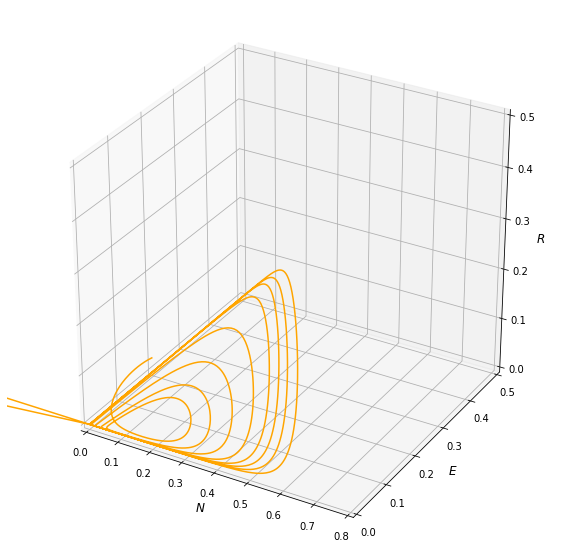

In [50]:
fig1 = plt.figure(figsize=(10,10))
axx = fig1.add_subplot(1,1,1, projection='3d')
sol = odeint(model, x0, t, args=(alpha1, alpha2, alpha3, beta1, beta2, beta3, beta4, r1, r2, r3, gamma1, h)) 
axx.plot3D(sol[:,0],sol[:,1], sol[:,2], color = 'orange') # or ax.plot3D(E,R,A, 'red')
axx.axes.set_xlim3d(left=0, right=.8) 
axx.axes.set_ylim3d(bottom=0, top=.5) 
axx.axes.set_zlim3d(bottom=0, top=.5) 
#axx.set_title('$\\beta_{1} = .30$\n')
axx.set_xlabel('$N$', fontsize=12, rotation = 0)
axx.set_ylabel('$E$', fontsize=12, rotation = 0)
axx.set_zlabel('$R$', fontsize=12, rotation = 0)

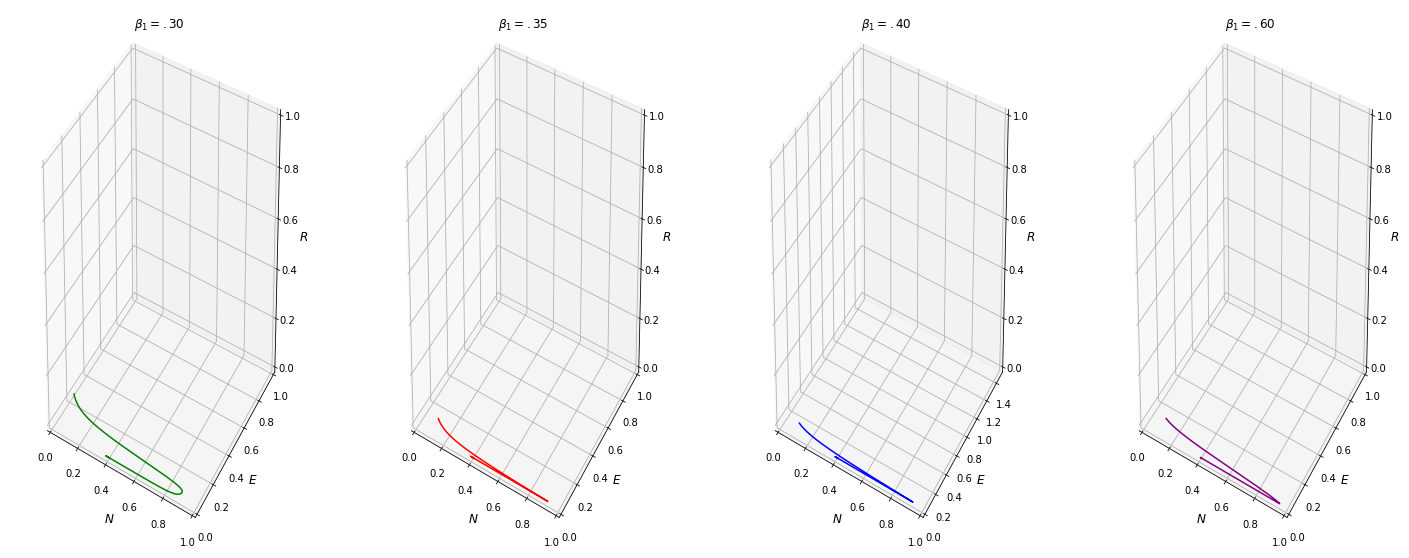

In [54]:
# this cell block will get limit cycles/phase plots

fig = plt.figure(figsize=(25,10))
 
# 3-D projection
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax1 = fig.add_subplot(1, 4, 2, projection='3d')
ax2 = fig.add_subplot(1, 4, 3, projection='3d')
ax3 = fig.add_subplot(1, 4, 4, projection='3d')

sol1 = odeint(model, x0, t, args=(alpha1, alpha2, alpha3, .30, beta2, beta3, beta4, r1, r2, r3, gamma1, h)) 
N1,E1,R1,A1 = sol1.T # get solution values for each variable

sol2 = odeint(model, x0, t, args=(alpha1, alpha2, alpha3, .35, beta2, beta3, beta4, r1, r2, r3, gamma1, h)) 

sol3 = odeint(model, x0, t, args=(alpha1, alpha2, alpha3, .40, beta2, beta3, beta4, r1, r2, r3, gamma1, h)) 

sol4 = odeint(model, x0, t, args=(alpha1, alpha2, alpha3, .60, beta2, beta3, beta4, r1, r2, r3, gamma1, h)) 

ax.plot3D(sol1[:,0],sol1[:,1], sol1[:,2], color = 'green') # or ax.plot3D(E,R,A, 'red')
ax.axes.set_xlim3d(left=0, right=1.) 
ax.axes.set_ylim3d(bottom=0, top=1.) 
ax.axes.set_zlim3d(bottom=0, top=1.) 
ax.set_title('$\\beta_{1} = .30$\n')
ax.set_xlabel('$N$', fontsize=12, rotation = 0)
ax.set_ylabel('$E$', fontsize=12, rotation = 0)
ax.set_zlabel('$R$', fontsize=12, rotation = 0)

ax1.plot3D(sol2[:,0],sol2[:,1], color = 'red')
ax1.axes.set_xlim3d(left=0, right=1.) 
ax1.axes.set_ylim3d(bottom=0, top=1.) 
ax1.axes.set_zlim3d(bottom=0, top=1.) 
ax1.set_title('$\\beta_{1} = .35$\n')
ax1.set_xlabel('$N$', fontsize=12, rotation = 0)
ax1.set_ylabel('$E$', fontsize=12, rotation = 0)
ax1.set_zlabel('$R$', fontsize=12, rotation = 0)

ax2.plot3D(sol3[:,0],sol3[:,1], color = 'blue')
ax2.axes.set_xlim3d(left=0, right=1) 
ax2.axes.set_ylim3d(bottom=0, top=1.5) 
ax2.axes.set_zlim3d(bottom=0, top=1) 
ax2.set_title('$\\beta_{1} = .40$\n')
ax2.set_xlabel('$N$', fontsize=12, rotation = 0)
ax2.set_ylabel('$E$', fontsize=12, rotation = 0)
ax2.set_zlabel('$R$', fontsize=12, rotation = 0)

ax3.plot3D(sol4[:,0],sol4[:,1], color='purple')
ax3.axes.set_xlim3d(left=0, right=1) 
ax3.axes.set_ylim3d(bottom=0, top=1) 
ax3.axes.set_zlim3d(bottom=0, top=1) 
ax3.set_title('$\\beta_{1} = .60$\n')
ax3.set_xlabel('$N$', fontsize=12, rotation = 0)
ax3.set_ylabel('$E$', fontsize=12, rotation = 0)
ax3.set_zlabel('$R$', fontsize=12, rotation = 0)
plt.show()

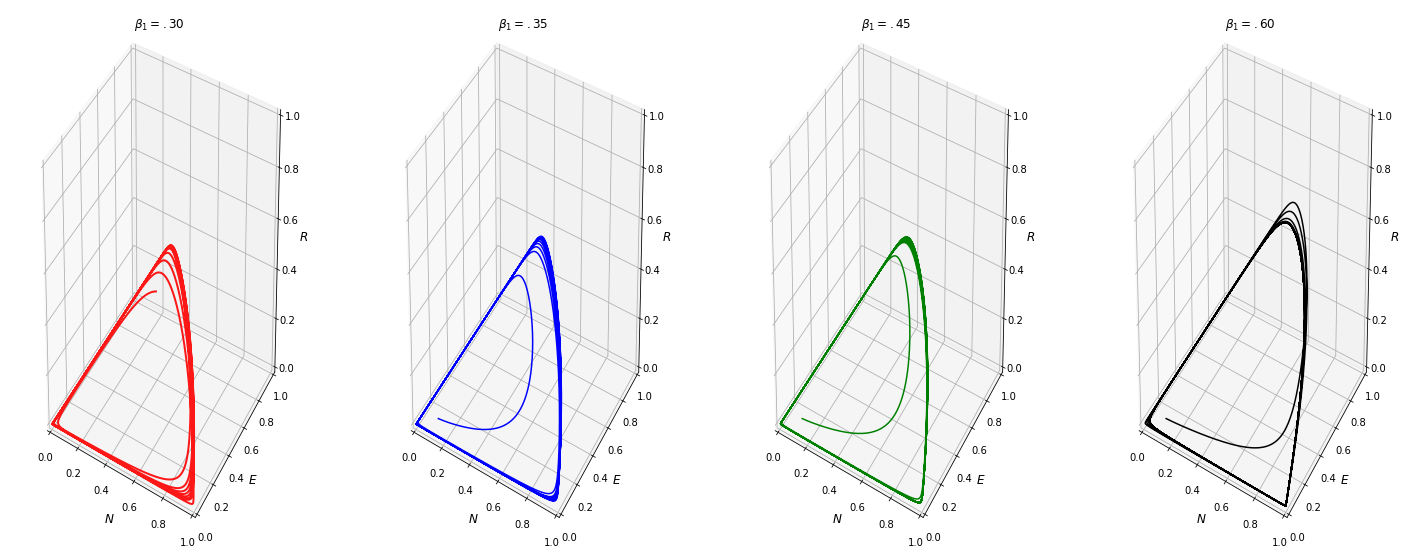

In [49]:
# this will be for version of model when alpha1, alpha2, gamma1 are assumed to be much less than 1
def F(z, t, alpha3:float, beta1:float, beta2:float, beta3:float, beta4:float, r1:float, r2:float, r3:float, h:float):
  N,E,R,A = z
  dNN = beta1*N*(1-N)-r1*N*E/(h+N)
  dEE = r1*N*E/(h+N) - r2*E*R/(h+E) - beta2*E 
  dRR = r2*E*R/(h+E)- beta3*R - r3*R*A/(h+R)
  dAA = r3*R*A/(h+R) - beta4*A 
  return np.array([dNN, dEE, dRR, dAA])

x01 = [0.1, 1.1, 0.7, 0.]
x02 = [0.1,.1,.1,0.1]
x03 = [0.1, 0.1,0.1,0.1]
x04 = [0.1,0.1,0.1,0.1]

t = np.linspace(0,1000,10000)

sol1 = odeint(F, x01, t, args=(alpha3, 0.3, beta2, beta3, beta4, r1, r2, r3, h))
sol2 = odeint(F, x02, t, args=(alpha3, 0.35, beta2, beta3, beta4, r1, r2, r3, h))
sol3 = odeint(F, x03, t, args=(alpha3, 0.4, beta2, beta3, beta4, r1, r2, r3, h))
sol4 = odeint(F, x04, t, args=(alpha3, 0.6, beta2, beta3, beta4, r1, r2, r3, h))

"""N, E, R, A = np.meshgrid(np.arange(0., 1.05, 0.1),
                      np.arange(0., 1.05, 0.1),
                      np.arange(0., 1.05, 0.1),
                      np.arange(0.,1.05,0.1)) 

u =  beta1*N*(1-N)-r1*N*E/(h+N)
v = r1*N*E/(h+N) - r2*E*R/(h+E) - beta2*E 
w = r2*E*R/(h+E)- beta3*R - r3*R*A/(h+R)
z = r3*R*A/(h+R) - beta4*A"""

fig = plt.figure(figsize=(25,10)) # initialize figure 

# 3-D projection
ax = fig.add_subplot(1, 4, 1, projection='3d')
ax1 = fig.add_subplot(1, 4, 2, projection='3d')
ax2 = fig.add_subplot(1, 4, 3, projection='3d')
ax3 = fig.add_subplot(1, 4, 4, projection='3d')

N1,E1,R1,A1 = sol.T # get solution values for each variable

#ax.quiver(N, E, R, u, v, w, length=0.2)
ax.plot3D(sol1[:,0],sol1[:,1], lw = 2, color = 'red', alpha = .9) # or ax.plot3D(E,R,A, color = 'red')
#ax.scatter( lw= 2, color = 'blue') # to show starting point
ax.axes.set_xlim3d(left=0, right=1.) 
ax.axes.set_ylim3d(bottom=0, top=1.) 
ax.axes.set_zlim3d(bottom=0, top=1.) 
ax.set_title('$\\beta_{1} = .30$\n')
ax.set_xlabel('$N$', fontsize=12, rotation = 0)
ax.set_ylabel('$E$', fontsize=12, rotation = 0)
ax.set_zlabel('$R$', fontsize=12, rotation = 0)

ax1.plot3D(sol2[:,0],sol2[:,1], color = 'blue') # or ax.plot3D(E,R,A, color = '')
#ax1.scatter(.1,.1,.1, lw= 2, color = 'blue') # to show starting point
ax1.axes.set_xlim3d(left=0, right=1.) 
ax1.axes.set_ylim3d(bottom=0, top=1.) 
ax1.axes.set_zlim3d(bottom=0, top=1.) 
ax1.set_title('$\\beta_{1} = .35$\n')
ax1.set_xlabel('$N$', fontsize=12, rotation = 0)
ax1.set_ylabel('$E$', fontsize=12, rotation = 0)
ax1.set_zlabel('$R$', fontsize=12, rotation = 0)

ax2.plot3D(sol3[:,0],sol3[:,1], color = 'green') # or ax.plot3D(E,R,A, color = '')
#ax2.scatter(.1,.1,.1, lw= 2, color = 'blue') # to show starting point
ax2.axes.set_xlim3d(left=0, right=1.) 
ax2.axes.set_ylim3d(bottom=0, top=1.) 
ax2.axes.set_zlim3d(bottom=0, top=1.) 
ax2.set_title('$\\beta_{1} = .45$\n')
ax2.set_xlabel('$N$', fontsize=12, rotation = 0)
ax2.set_ylabel('$E$', fontsize=12, rotation = 0)
ax2.set_zlabel('$R$', fontsize=12, rotation = 0)

ax3.plot3D(sol4[:,0],sol4[:,1], color = 'black') # or ax.plot3D(E,R,A, color='')
#ax3.scatter(.1,.1,.1, lw= 2, color = 'blue') # to show starting point
ax3.axes.set_xlim3d(left=0, right=1.) 
ax3.axes.set_ylim3d(bottom=0, top=1.) 
ax3.axes.set_zlim3d(bottom=0, top=1.) 
ax3.set_title('$\\beta_{1} = .60$\n')
ax3.set_xlabel('$N$', fontsize=12, rotation = 0)
ax3.set_ylabel('$E$', fontsize=12, rotation = 0)
ax3.set_zlabel('$R$', fontsize=12, rotation = 0)



plt.show()